Test the modules and functions of modelval

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
% matplotlib inline
%load_ext autoreload
    
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
data = pd.read_csv('/src/Plasticity_Ker/data/kernel_training_data_auto.csv')

In [11]:
data[data['ptl_idx']==1].head()

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste
0,1,1,0,1,0,60,1.0,-102.898046,0.0,0,-1.322590,0.0
1,1,1,0,1,0,60,1.0,-75.579896,0.0,0,2.674768,0.0
2,1,1,0,1,0,60,1.0,-80.871473,0.0,0,-12.696449,0.0
3,1,1,0,1,0,60,1.0,-67.562239,0.0,0,0.231446,0.0
4,1,1,0,1,0,60,1.0,-63.553410,0.0,0,-0.990216,0.0


Test KernelGen object

In [13]:
from modelval.kernel import KernelGen

In [14]:
ker_test = KernelGen()

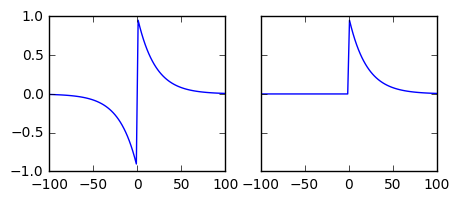

In [16]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True)
fig.set_figwidth(5)
fig.set_figheight(2)
ax[0].plot(ker_test.x, ker_test.bilat_ker)
ax[0].set_xlim(-100, 100)
uni_ker = ker_test.uni_exp_ker()
ax[1].plot(ker_test.x, ker_test.unilat_ker)

Test KernelGen function

In [17]:
from modelval.ArbDataGen import arb_spk_gen

In [18]:
test_ptl = PairPtl(*data.iloc[10])
spk_time_pre, spk_time_post, spk_pair = arb_spk_gen(test_ptl, ker_test.reso_kernel, if_noise=1)

In [19]:
spk_time_pre

array([  188,   688,  1188,  1688,  2188,  2688,  3188,  3688,  4188,
        4688,  5188,  5688,  6188,  6688,  7188,  7688,  8188,  8688,
        9188,  9688, 10188, 10688, 11188, 11688, 12188, 12688, 13188,
       13688, 14188, 14688, 15188, 15688, 16188, 16688, 17188, 17688,
       18188, 18688, 19188, 19688, 20188, 20688, 21188, 21688, 22188,
       22688, 23188, 23688, 24188, 24688, 25188, 25688, 26188, 26688,
       27188, 27688, 28188, 28688, 29188, 29688])

In [20]:
spk_time_post

array([  180,   679,  1183,  1680,  2178,  2679,  3181,  3682,  4178,
        4682,  5180,  5678,  6180,  6679,  7180,  7683,  8181,  8678,
        9179,  9673, 10176, 10680, 11180, 11678, 12181, 12676, 13179,
       13677, 14179, 14678, 15180, 15680, 16180, 16678, 17181, 17677,
       18181, 18680, 19183, 19680, 20180, 20680, 21180, 21681, 22180,
       22681, 23179, 23680, 24183, 24681, 25180, 25683, 26182, 26681,
       27180, 27680, 28184, 28679, 29184, 29680])

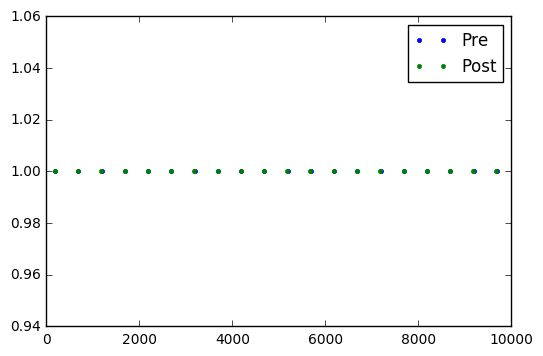

In [21]:
plt.plot(spk_time_pre[:20], np.ones(20), '.', label='Pre')
plt.plot(spk_time_post[:20], np.ones(20), '.', label='Post')
plt.legend()
#plt.axis([0,200,0.9,1.1])

Test dataset

In [22]:
from modelval.dataset import Dataset

In [23]:
x = np.random.normal(loc=0.0, scale=1.0, size=[10000,10])

In [24]:
w_true = np.ones(shape=(10,1)) * 0.5
y_true = np.dot(x, w_true)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_vali, y_train, y_vali = train_test_split(x, y_true, test_size=0.1)

In [27]:
train_data = Dataset(X_train, y_train)

In [28]:
vali_data = Dataset(X_vali, y_vali)

Test network class

In [29]:
from modelval.network import BaseNet

In [30]:
# Build the basic network
basenet = BaseNet()

In [31]:
from modelval.trainer import Trainer

In [32]:
basenet_train = Trainer(basenet.loss, input_name=basenet.X, target_name=basenet.y, save_dir='/src/Plasticity_Ker/model/',  optimizer_config={'learning_rate': basenet.lr})

In [33]:
learning_rate = 0.001
iterations = 3
for i in range(iterations):
    # test_net.train(train_data, vali_data, feed_dict={lr: learning_rate, l1: 0.001, l2: 0.001})
    basenet_train.train(train_data, vali_data, feed_dict={basenet.lr: learning_rate})
    learning_rate = learning_rate/3


Initial validation cost=1314.30713
Global Step 0200 and Step 0200: validation cost=808.99316
Updated min validation loss!Saving model...
Global Step 0400 and Step 0400: validation cost=455.06076
Updated min validation loss!Saving model...
Global Step 0600 and Step 0600: validation cost=301.10376
Updated min validation loss!Saving model...
Global Step 0800 and Step 0800: validation cost=166.96881
Updated min validation loss!Saving model...
Global Step 1000 and Step 1000: validation cost=68.70240
Updated min validation loss!Saving model...
Global Step 1200 and Step 1200: validation cost=33.96545
Updated min validation loss!Saving model...
Global Step 1400 and Step 1400: validation cost=16.72872
Updated min validation loss!Saving model...
Global Step 1600 and Step 1600: validation cost=6.76650
Updated min validation loss!Saving model...
Global Step 1800 and Step 1800: validation cost=3.39062
Updated min validation loss!Saving model...
Global Step 2000 and Step 2000: validation cost=1.022

In [34]:
w_hat = basenet_train.evaluate(ops=basenet.w)

In [35]:
w_hat

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

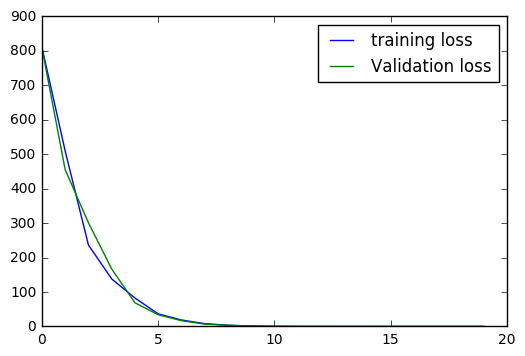

In [36]:
loss = np.vstack(basenet_train.loss_tracker)
plt.plot(loss[:20,0], label = 'training loss')
plt.plot(loss[:20,1], label = 'Validation loss')
plt.legend()

Test PairNet

In [41]:
from modelval.network import PairNet

In [42]:
# Create arbitrary spike train to validate the restuls
spk_train = np.zeros((30000, 2))
spk_train[1000, :] = 1
spk_train = spk_train.reshape([1, 30000, 2])

In [44]:
pairnet_test = PairNet(kernel=ker_test, n_input=spk_train.shape[1], kernel_pre=ker_test.bilat_ker, kernel_post=ker_test.unilat_ker)

In [45]:
pairnet_test_train = Trainer(pairnet_test.prediction, input_name=pairnet_test.inputs)

In [46]:
test_ptl = PairPtl(*data.iloc[10])
spk_time_pre, spk_time_post, spk_pair = arb_spk_gen(test_ptl, ker_test.reso_kernel, if_noise=1)
spk_pair = spk_pair.reshape([1, 30000, 2])

In [47]:
pairnet_test_train.evaluate(ops=pairnet_test.prediction, inputs=spk_train)

array([[[4.946867]]], dtype=float32)

In [49]:
np.sum(np.multiply(ker_test.bilat_ker, ker_test.unilat_ker))

4.946866897552985

Test generating batch spike trains

In [50]:
from modelval.kernel import KernelGen
ker_test = KernelGen()

In [51]:
from modelval.ArbDataGen import arb_w_gen

In [52]:
spk_pairs, targets = arb_w_gen(df=data, ptl_list=[1], kernel=ker_test, aug_times=1)

In [53]:
spk_pairs.shape

(45, 150000, 2)

In [54]:
targets.shape

(45, 1, 1)